In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Задача

Требуется, на основании имеющихся данных о клиентах банка, построить модель, используя обучающий датасет, для прогнозирования невыполнения долговых обязательств по текущему кредиту. Выполнить прогноз для примеров из тестового датасета.

# Наименование файлов с данными

# Целевая переменная

Credit Default - факт невыполнения кредитных обязательств

# Метрика качества

 F1-score (sklearn.metrics.f1_score)

# Требования к решению

Целевая метрика

 F1 > 0.5 при Precision > 0.5 и Recall > 0.5

Метрика оценивается по качеству прогноза для главного класса (1 - просрочка по кредиту)

# Решение должно содержать

1.Тетрадка(ки) Jupyter Notebook с кодом Вашего решения, названная по образцу {ФИО}_solution.ipynb, пример BBexeitov_solution.ipynb

2.Файл CSV с прогнозами целевой переменной для тестового датасета, названный по образцу {ФИО}_predictions.csv, пример BBexeitov_predictions.csv

# Рекомендации для файла с кодом (ipynb)

1.Файл должен содержать заголовки и комментарии (markdown)

2.Повторяющиеся операции лучше оформлять в виде функций

3.Не делать вывод большого количества строк таблиц (5-10 достаточно)

4.По возможности добавлять графики, описывающие данные (около 3-5)

5.Добавлять только лучшую модель, то есть не включать в код все варианты решения проекта

6.Скрипт проекта должен отрабатывать от начала и до конца (от загрузки данных до выгрузки предсказаний)

7.Весь проект должен быть в одном скрипте (файл ipynb).

8.Допускается применение библиотек Python и моделей машинного обучения, которые были в данном курсе.

# Примерное описание этапов выполнения курсового проекта

# Построение модели классификации

1.Обзор обучающего датасета

2.Повторяющиеся операции лучше оформлять в виде функций

3.Не делать вывод большого количества строк таблиц (5-10 достаточно)

4.По возможности добавлять графики, описывающие данные (около 3-5)

5.Добавлять только лучшую модель, то есть не включать в код все варианты решения проекта

6.Скрипт проекта должен отрабатывать от начала и до конца (от загрузки данных до выгрузки предсказаний)

7.Весь проект должен быть в одном скрипте (файл ipynb)

8.Допускается применение библиотек Python и моделей машинного обучения, которые были в данном курсе

# Примерное описание этапов выполнения курсового проекта

# Построение модели классификации

1.Обзор обучающего датасета

2.Обработка выбросов

3.Обработка пропусков

4.Анализ данных

5.Отбор признаков

6.Балансировка классов

7.Подбор моделей, получение бейзлана

8.Выбор наилучшей модели, настройка гиперпараметров

9.Проверка качества, борьба с переобучением

10.Интерпретация результатов

# Прогнозирование на тестовом датасете

1.Выполнить для тестового датасета те же этапы обработки и постронияния признаков

2.Спрогнозировать целевую переменную, используя модель, построенную на обучающем датасете

3.Прогнозы должны быть для всех примеров из тестового датасета (для всех строк)

4.Соблюдать исходный порядок примеров из тестового датасета

# Описание датасета

Home Ownership - домовладение

Annual Income - годовой доход

Years in current job - количество лет на текущем месте работы

Tax Liens - налоговые льготы

Number of Open Accounts - количество открытых счетов

Years of Credit History - количество лет кредитной истории

Maximum Open Credit - наибольший открытый кредит

Number of Credit Problems - количество проблем с кредитом

Months since last delinquent - количество месяцев с последней просрочки платежа

Bankruptcies - банкротства

Purpose - цель кредита

Term - срок кредита

Current Loan Amount - текущая сумма кредита

Current Credit Balance - текущий кредитный баланс

Monthly Debt - ежемесячный долг

Credit Default - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [52]:
df_train = pd.read_csv('course_project_train.csv')
df_test = pd.read_csv('course_project_test.csv')

Анализ данных

In [53]:
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [54]:
df_train.shape

(7500, 17)

In [55]:
df_train.iloc[0]

Home Ownership                            Own Home
Annual Income                               482087
Years in current job                           NaN
Tax Liens                                        0
Number of Open Accounts                         11
Years of Credit History                       26.3
Maximum Open Credit                         685960
Number of Credit Problems                        1
Months since last delinquent                   NaN
Bankruptcies                                     1
Purpose                         debt consolidation
Term                                    Short Term
Current Loan Amount                          1e+08
Current Credit Balance                       47386
Monthly Debt                                  7914
Credit Score                                   749
Credit Default                                   0
Name: 0, dtype: object

In [56]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

# Cтатистика + транспонирование данны

In [57]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Annual Income,5943.0,1.366392e+06,8.453392e+05,164597.0,844341.0,1168386.0,1640137.00,1.014934e+07
Tax Liens,7500.0,3.013333e-02,2.716035e-01,0.0,0.0,0.0,0.00,7.000000e+00
Number of Open Accounts,7500.0,1.113093e+01,4.908924e+00,2.0,8.0,10.0,14.00,4.300000e+01
Years of Credit History,7500.0,1.831747e+01,7.041946e+00,4.0,13.5,17.0,21.80,5.770000e+01
Maximum Open Credit,7500.0,9.451537e+05,1.602622e+07,0.0,279229.5,478159.0,793501.50,1.304726e+09
Number of Credit Problems,7500.0,1.700000e-01,4.985978e-01,0.0,0.0,0.0,0.00,7.000000e+00
Months since last delinquent,3419.0,3.469260e+01,2.168881e+01,0.0,16.0,32.0,50.00,1.180000e+02
Bankruptcies,7486.0,1.171520e-01,3.471917e-01,0.0,0.0,0.0,0.00,4.000000e+00
Current Loan Amount,7500.0,1.187318e+07,3.192612e+07,11242.0,180169.0,309573.0,519882.00,1.000000e+08
Current Credit Balance,7500.0,2.898332e+05,3.178714e+05,0.0,114256.5,209323.0,360406.25,6.506797e+06


Визуализация распределения по Credit Default (https://nagornyy.me/courses/data-science/intro-to-seaborn/)¶

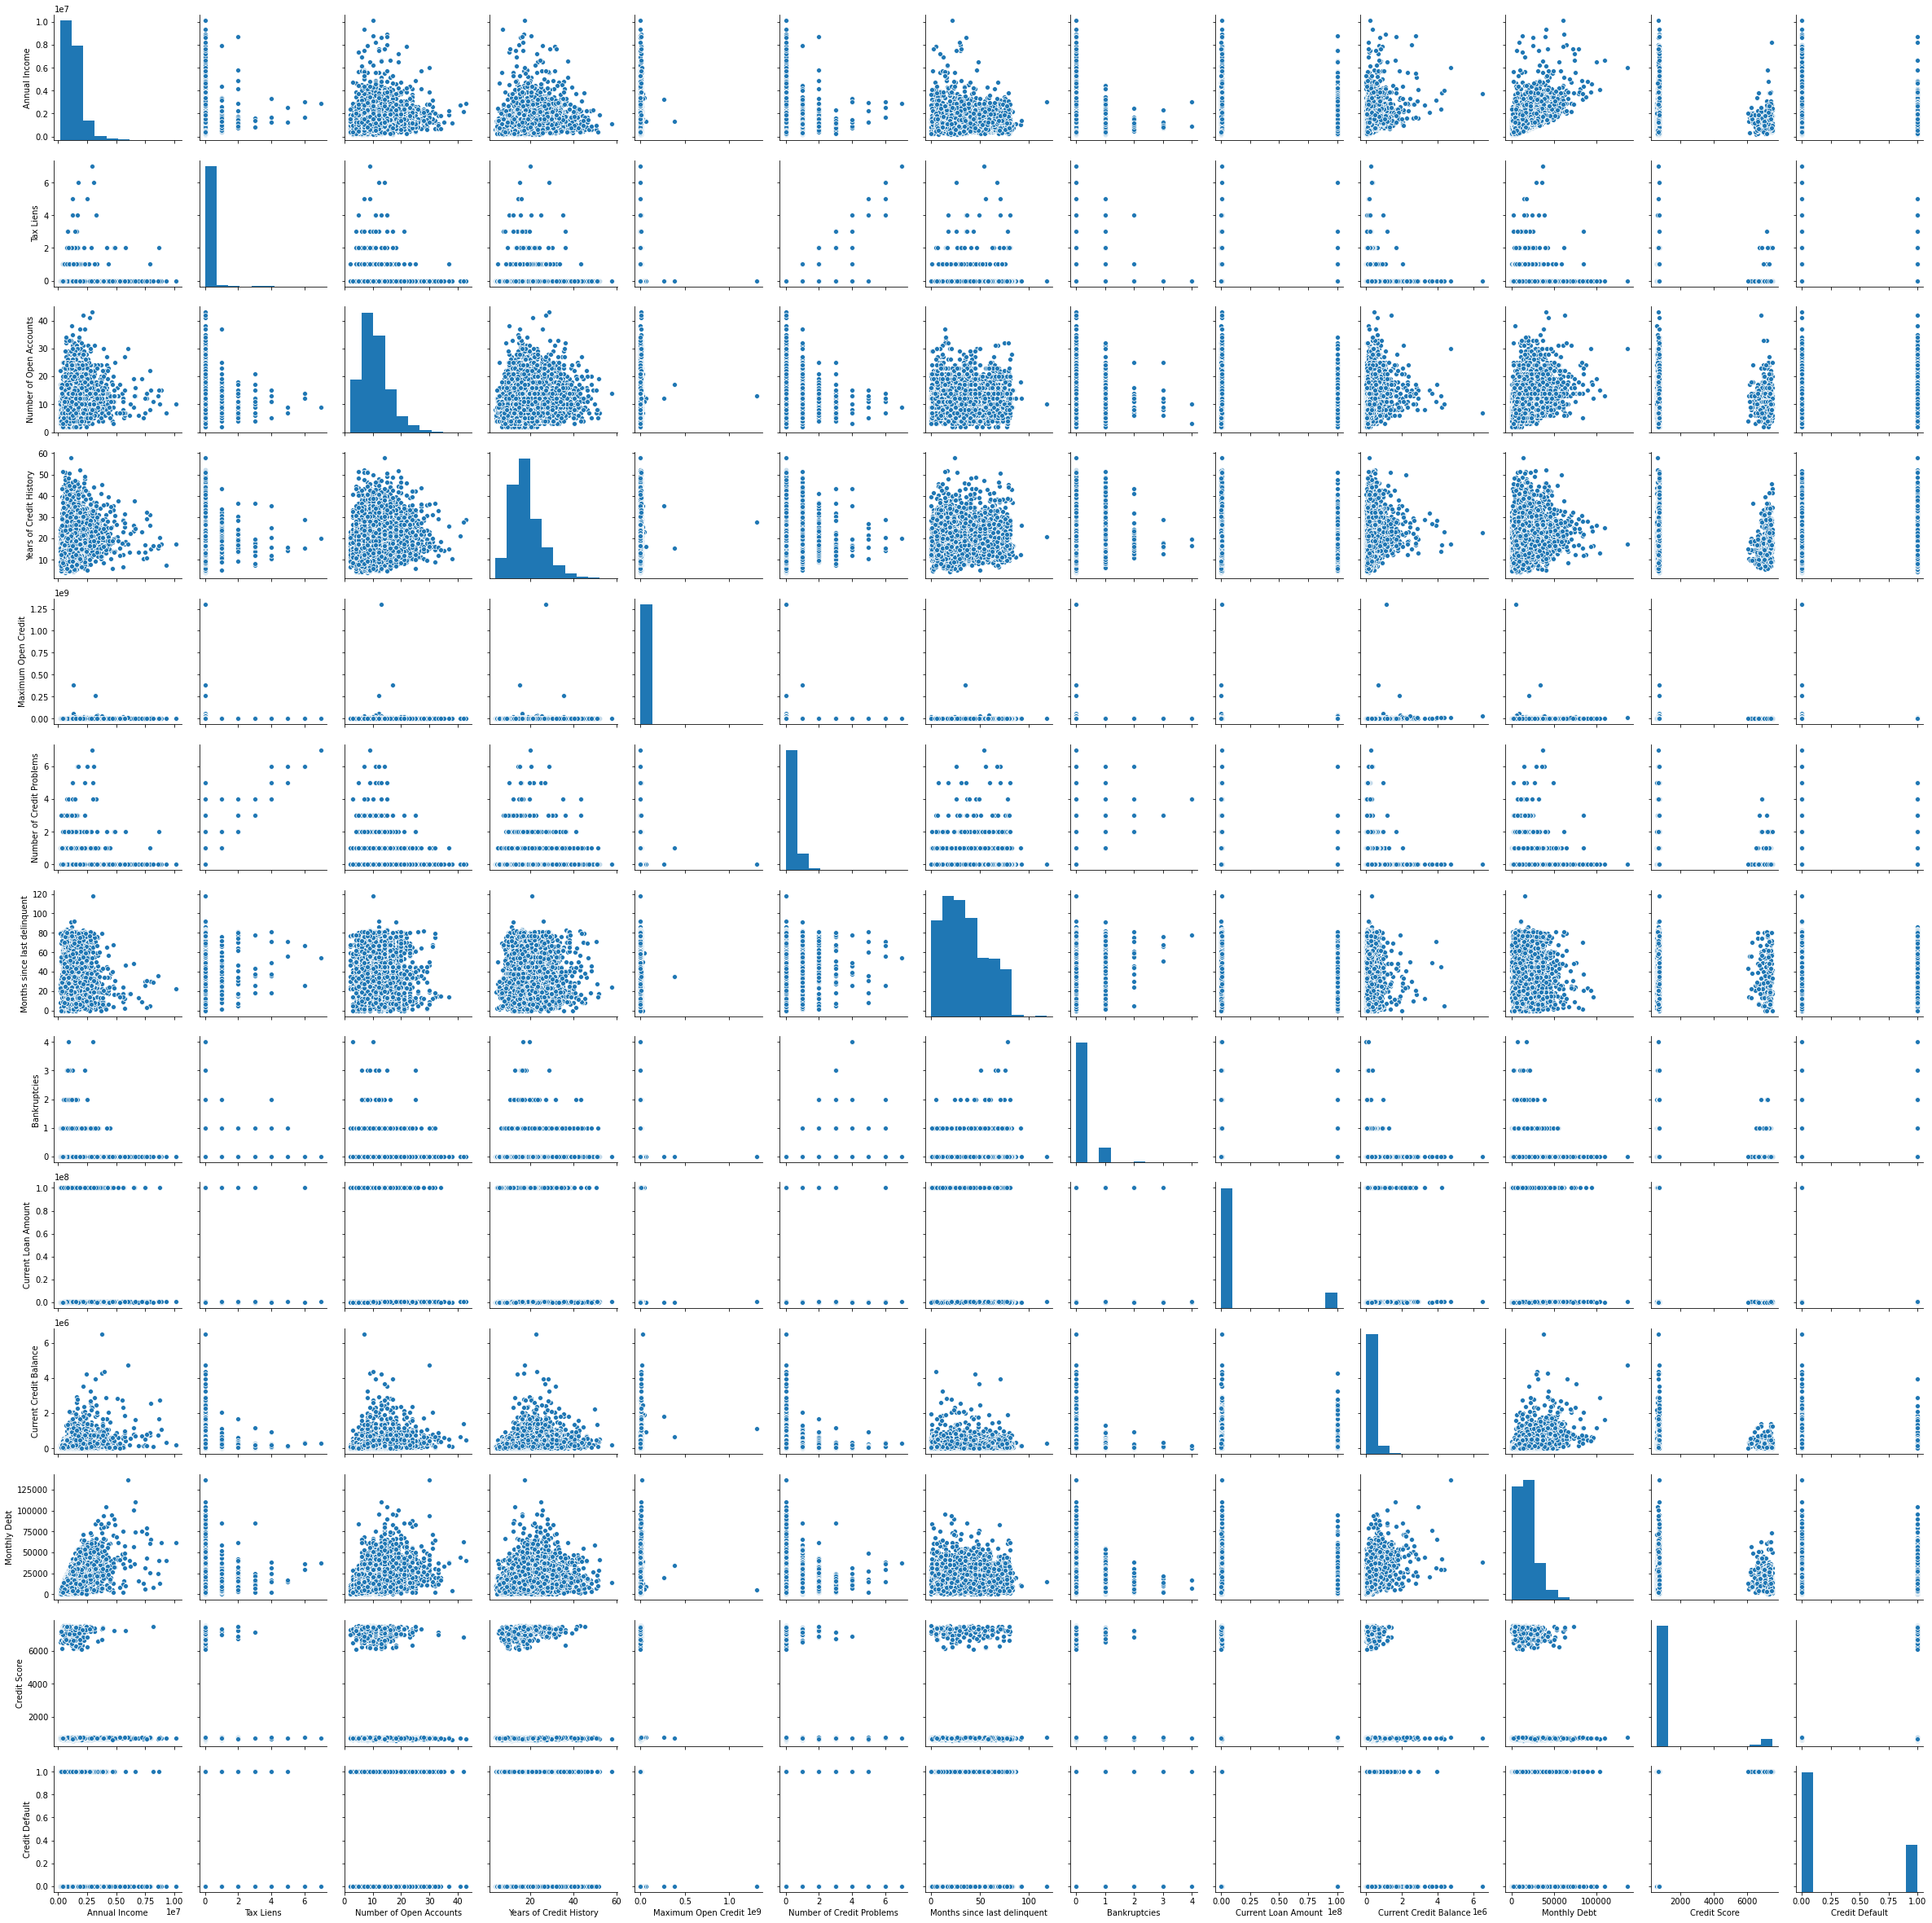

In [58]:
sns.pairplot(df_train);

C:\Users\Baur\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Baur\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Baur\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Baur\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Baur\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Baur\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default ba

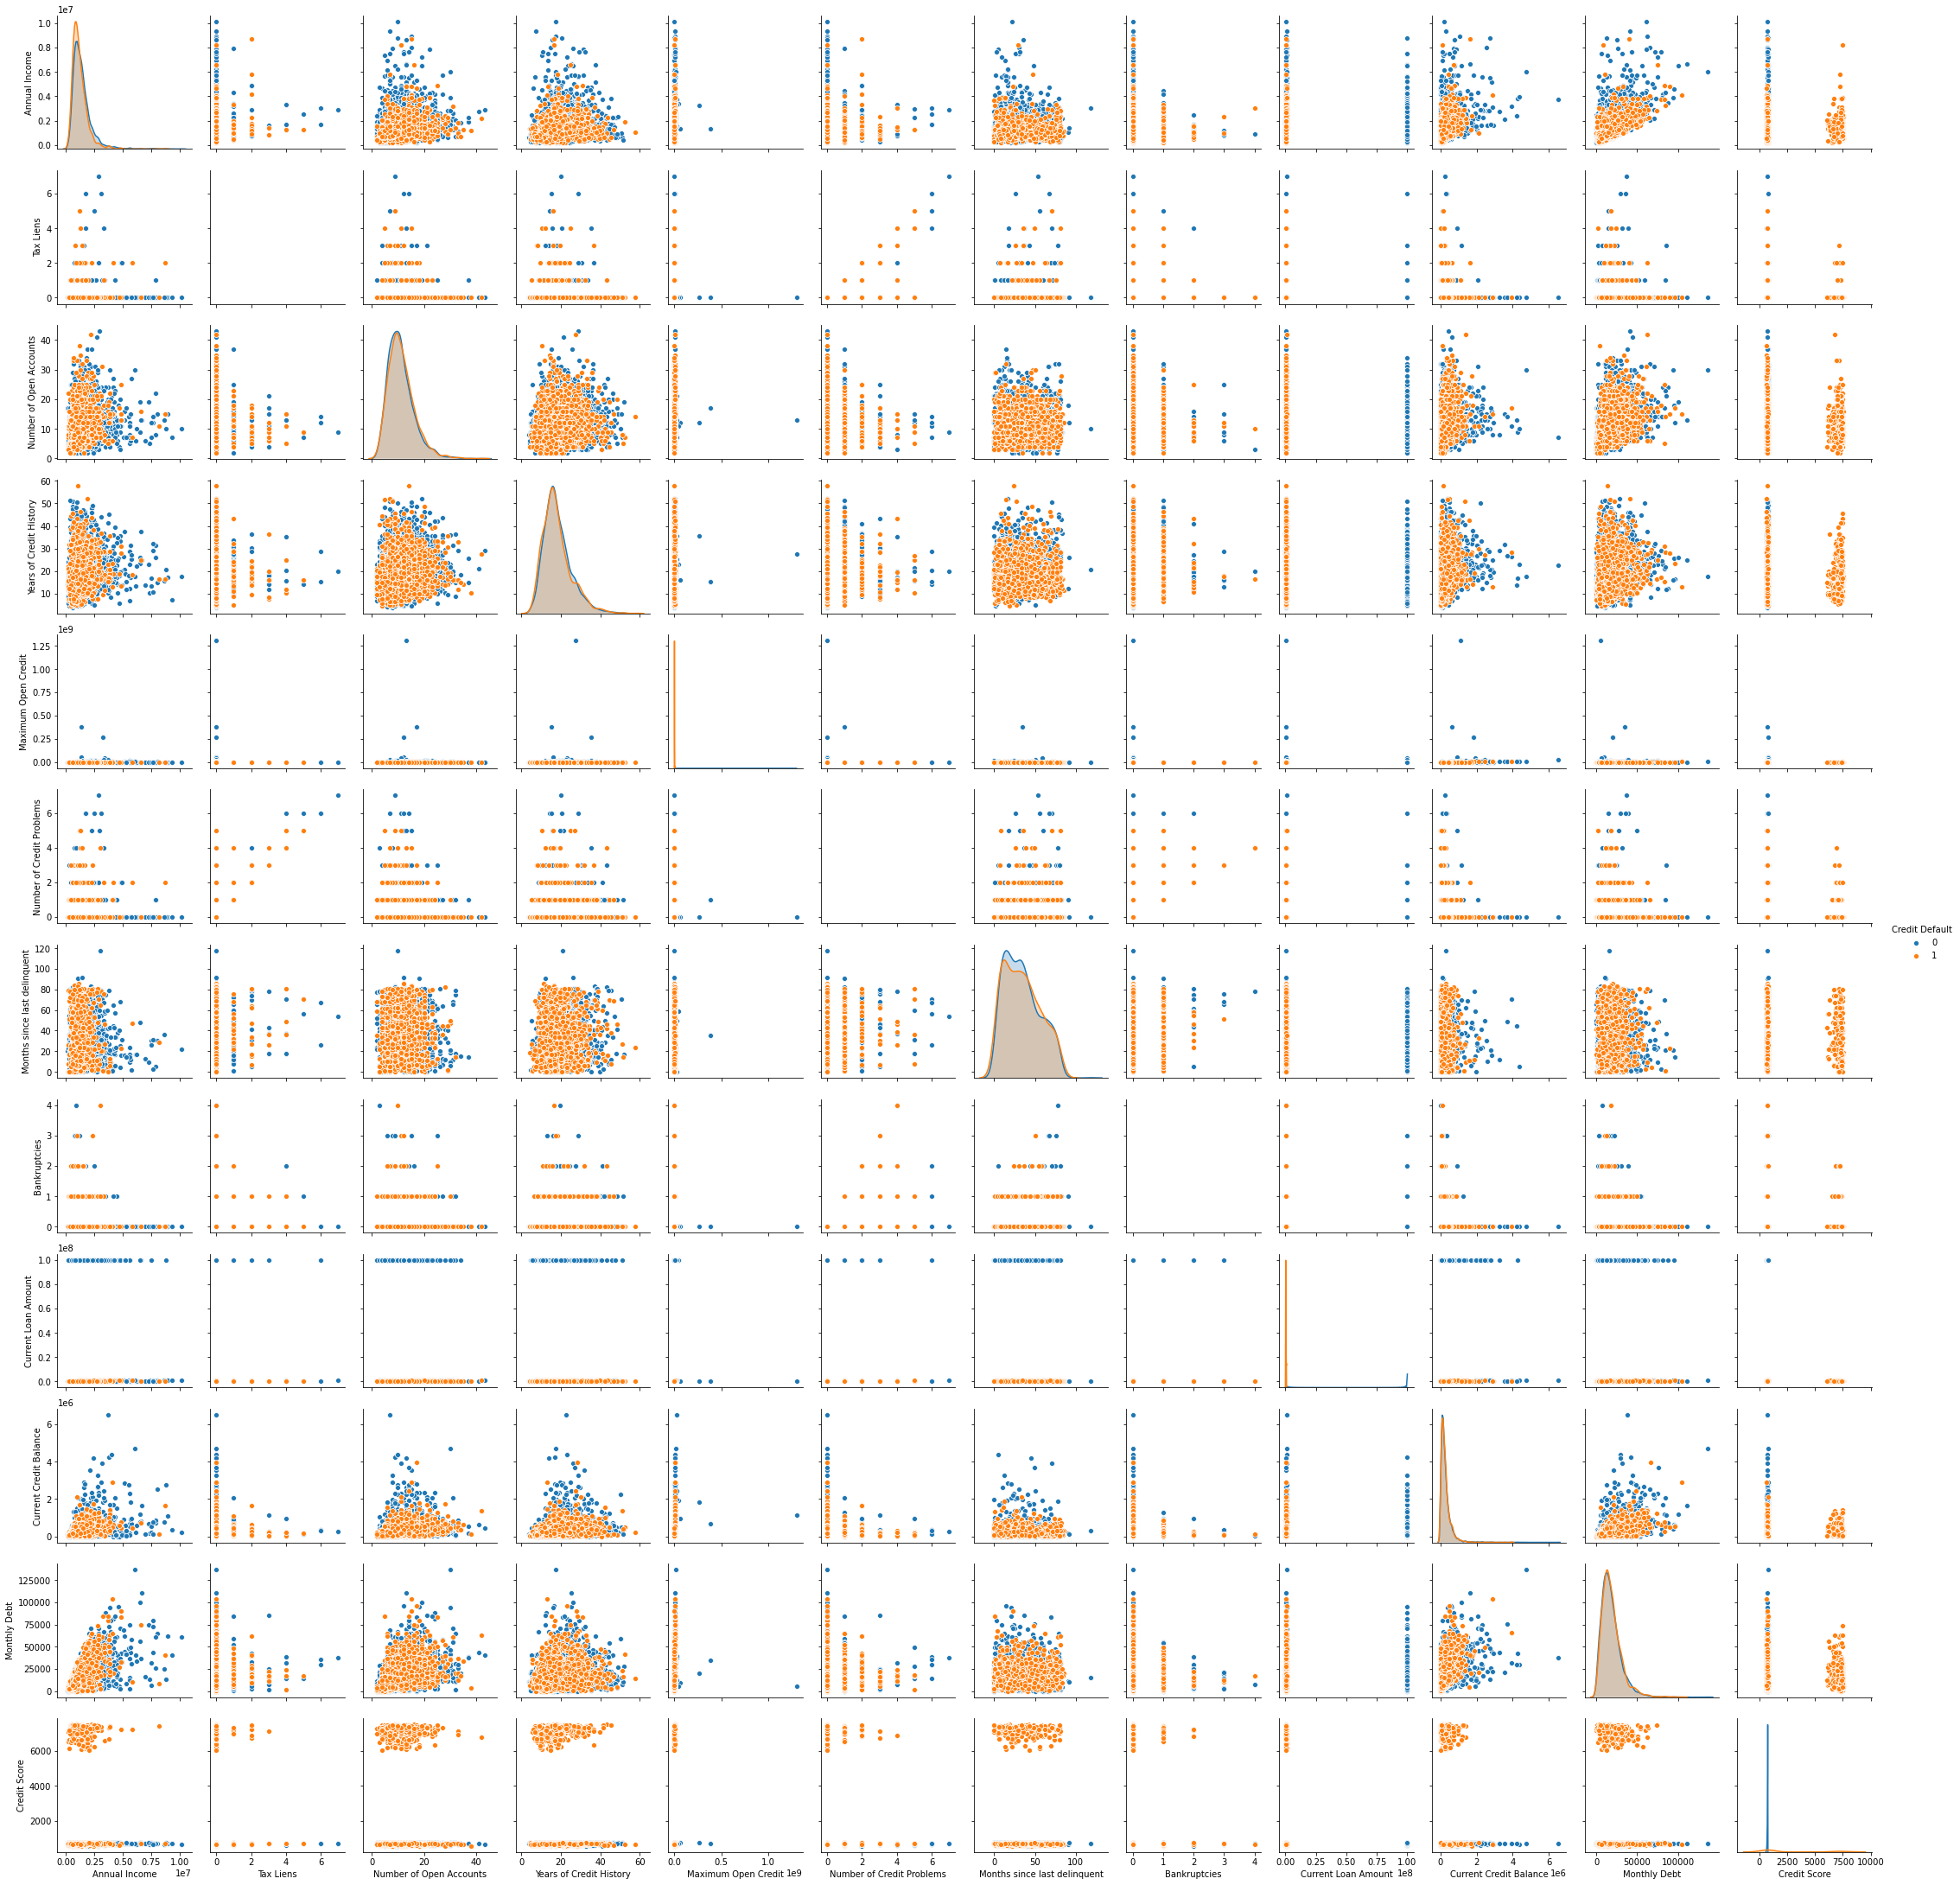

In [59]:
sns.pairplot(df_train, hue='Credit Default');

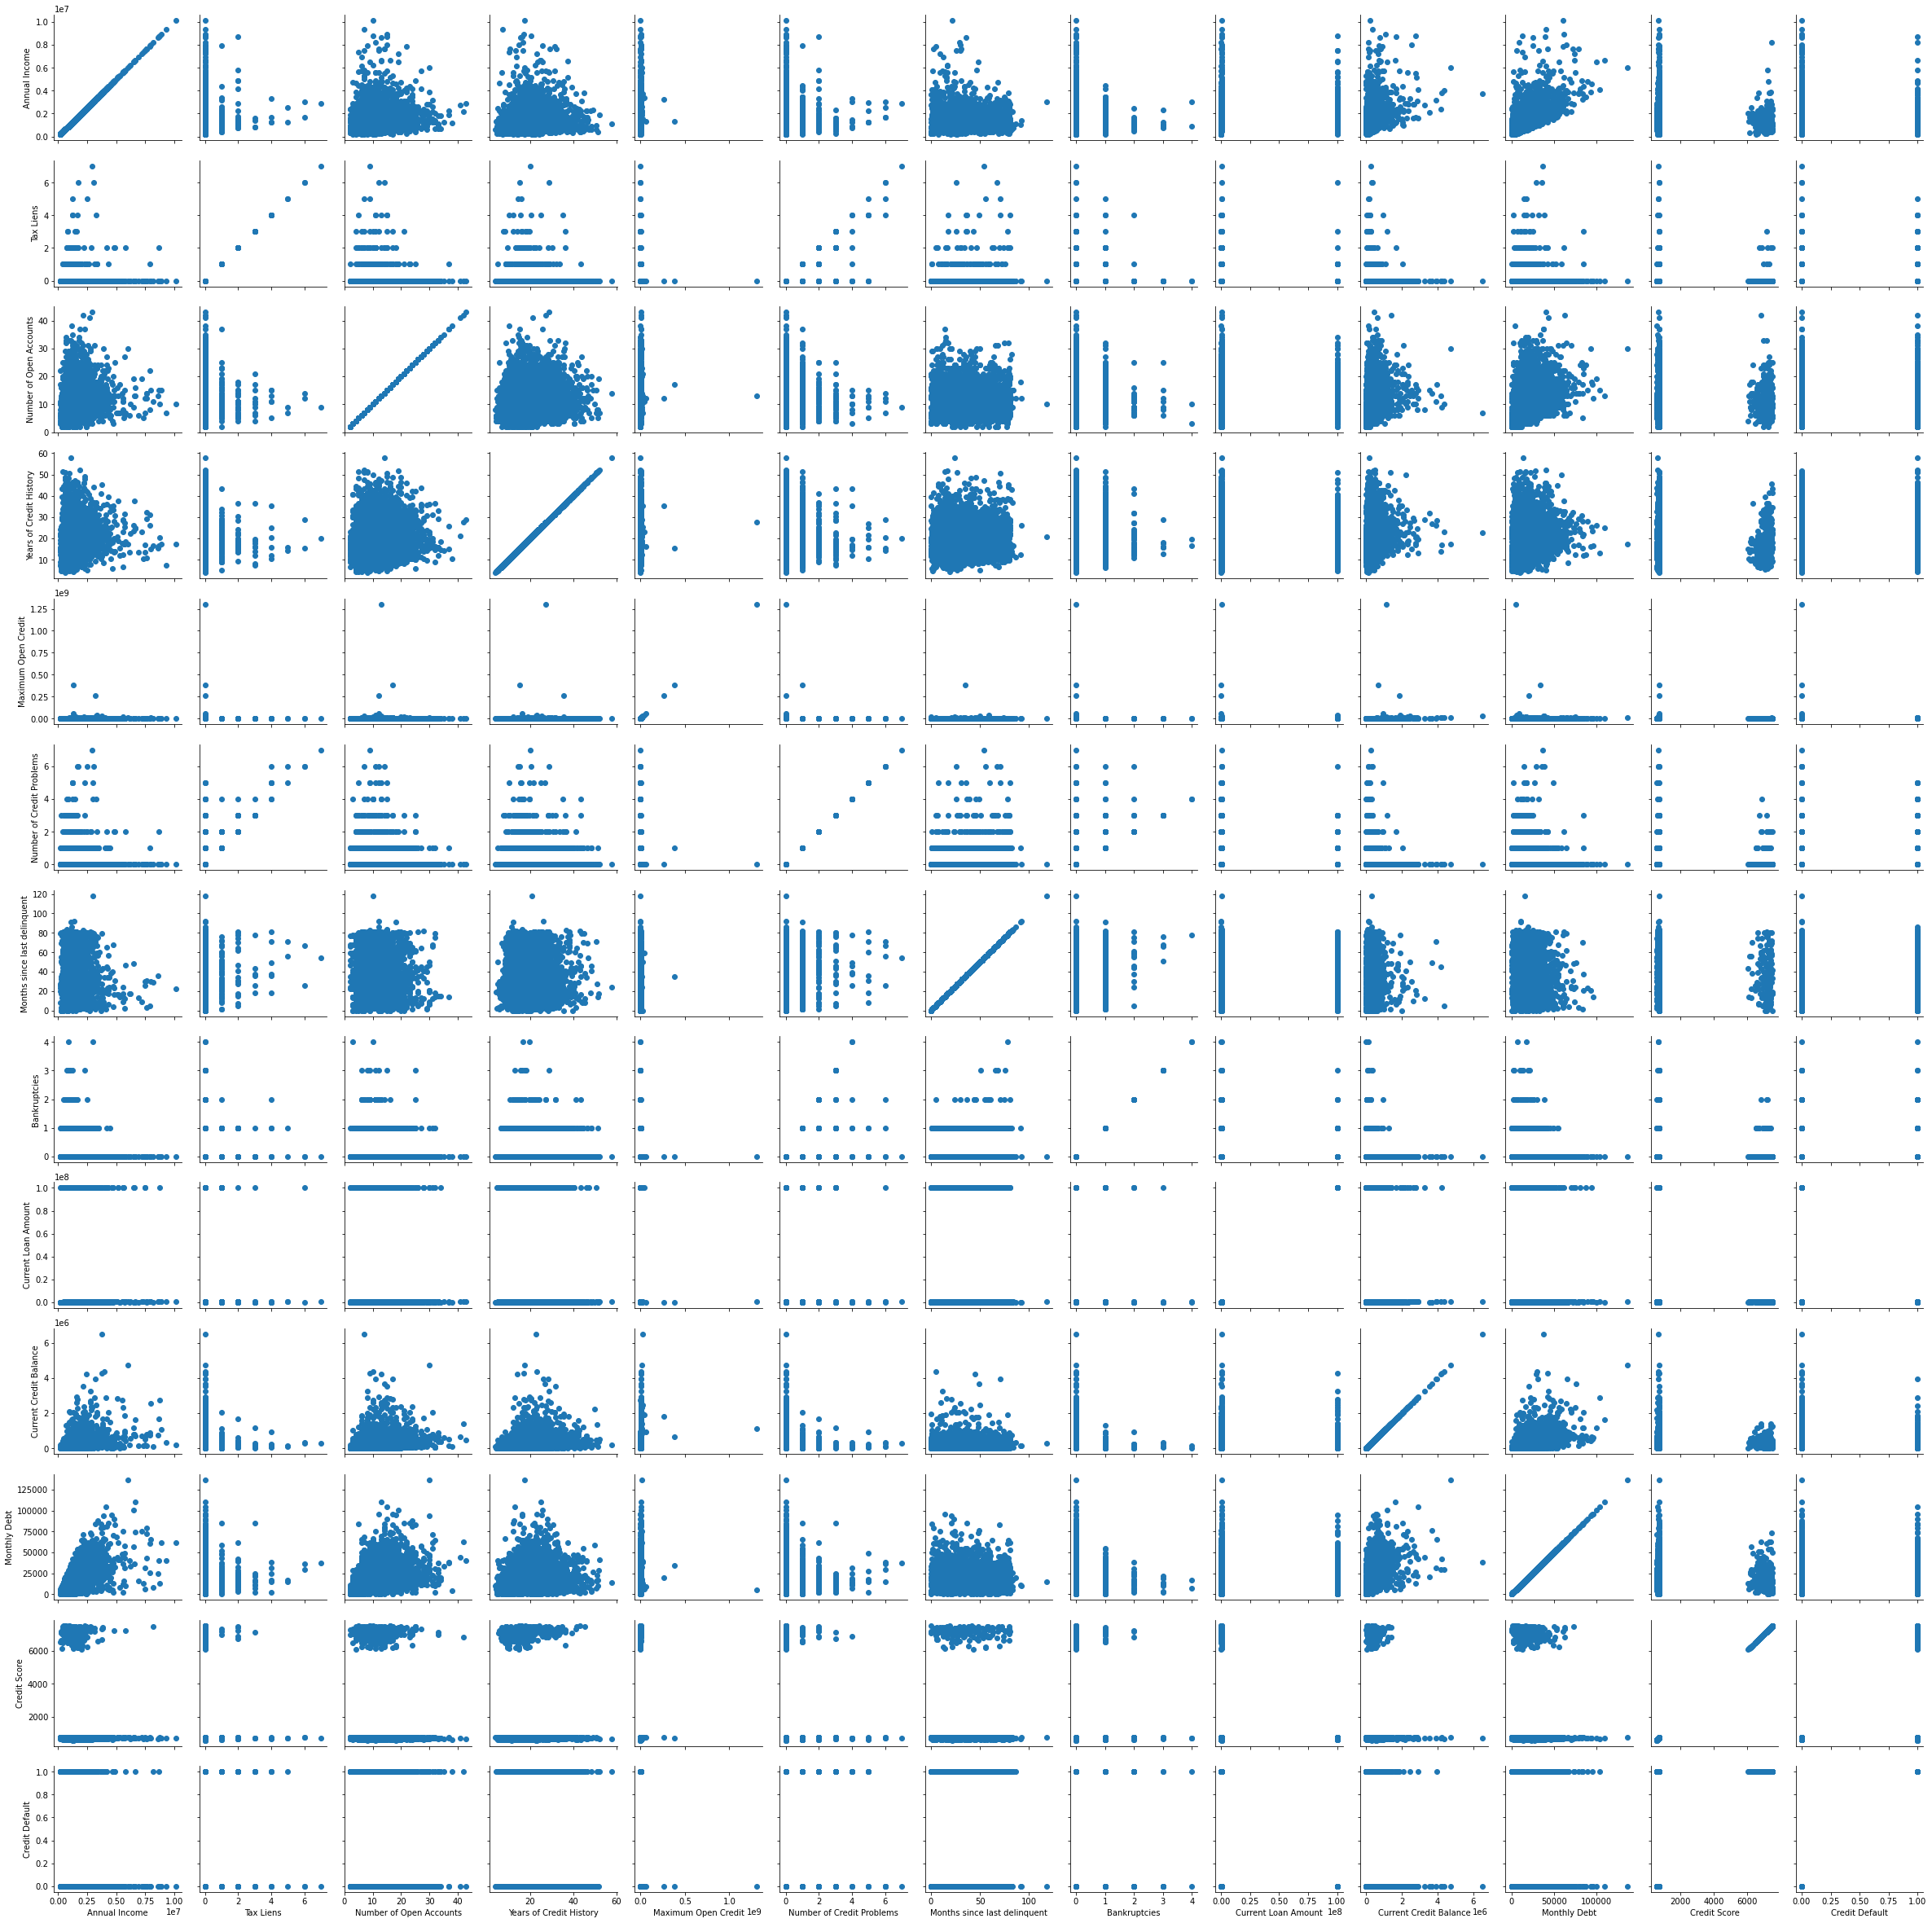

In [60]:
g = sns.PairGrid(df_train)
g.map(plt.scatter);

Тепловая карта

In [61]:
corr = df_train.corr()
corr

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
Annual Income,1.000000,0.066245,0.188524,0.186531,0.062218,-0.015407,-0.101787,-0.066877,0.032082,0.386481,0.584819,-0.037832,-0.101375
Tax Liens,0.066245,1.000000,-0.005360,0.009109,-0.002410,0.595339,0.052446,0.057360,-0.007835,-0.010195,0.027211,0.010581,0.024368
Number of Open Accounts,0.188524,-0.005360,1.000000,0.144819,0.023897,-0.017813,-0.032740,-0.019130,0.001346,0.267325,0.413904,0.016095,0.028884
Years of Credit History,0.186531,0.009109,0.144819,1.000000,0.029247,0.071259,-0.015375,0.085699,0.010623,0.217856,0.191978,-0.015683,-0.020567
Maximum Open Credit,0.062218,-0.002410,0.023897,0.029247,1.000000,-0.004750,-0.003849,-0.011650,-0.002334,0.088090,0.010197,-0.009136,-0.014275
Number of Credit Problems,-0.015407,0.595339,-0.017813,0.071259,-0.004750,1.000000,0.139905,0.730751,-0.008596,-0.124137,-0.042252,-0.018473,0.020088
Months since last delinquent,-0.101787,0.052446,-0.032740,-0.015375,-0.003849,0.139905,1.000000,0.162710,0.000459,-0.027198,-0.057702,-0.004395,0.002598
Bankruptcies,-0.066877,0.057360,-0.019130,0.085699,-0.011650,0.730751,0.162710,1.000000,-0.005987,-0.142849,-0.079579,-0.027488,0.001648
Current Loan Amount,0.032082,-0.007835,0.001346,0.010623,-0.002334,-0.008596,0.000459,-0.005987,1.000000,0.016672,-0.009382,-0.108552,-0.226522
Current Credit Balance,0.386481,-0.010195,0.267325,0.217856,0.088090,-0.124137,-0.027198,-0.142849,0.016672,1.000000,0.504964,-0.006159,-0.019522


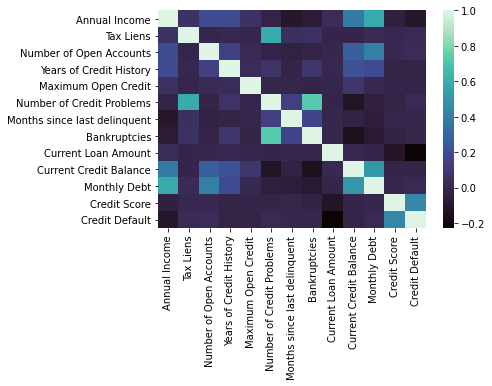

In [62]:
# http://seaborn.pydata.org/generated/seaborn.clustermap.html - примеры настроек
sns.heatmap(corr, cmap='mako');

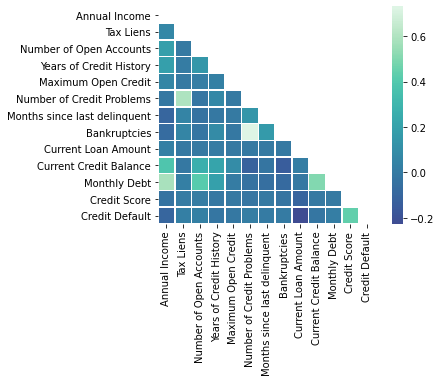

In [63]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, square=True, center=0, linewidths=.5, cmap='mako');

In [64]:
# By setting normalize=True , the object returned will contain the relative frequencies of the unique values.
df_train['Credit Default'].value_counts(normalize=True)

0    0.718267
1    0.281733
Name: Credit Default, dtype: float64

Обработка выбросов

In [65]:
train = df_train[~df_train['Tax Liens'].isin([6, 7])].copy()
train = train[train['Maximum Open Credit'] > 0]
train = train[np.log1p(train['Maximum Open Credit']) <= 16]
train = train[~train['Number of Credit Problems'].isin([6, 7])]
train = train[train['Months since last delinquent'].fillna(0) <= 100]
train = train[np.log1p(train['Current Loan Amount']) <= 14]
train = train[np.log1p(train['Current Credit Balance']) > 0]
train = train[~train['Purpose'].isin(['renewable energy'])]
train = train[train['Monthly Debt'] <= 120000]

In [66]:
train.shape

(6548, 17)

In [67]:
train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0
5,Rent,NaN,7 years,0.0,12.0,14.6,366784.0,0.0,NaN,0.0,other,Long Term,337304.0,165680.0,18692.0,NaN,1
7,Rent,1040060.0,10+ years,0.0,13.0,12.0,330374.0,0.0,18.0,0.0,other,Short Term,250888.0,89015.0,19761.0,705.0,1


Обработка данных

In [68]:
categ_features = list(df_train.select_dtypes(include=[object]).columns.values)
number_features = list(feature for feature in df_train.columns if feature not in categ_features)

In [69]:

# Добавляем детализацию данных
def data_processing(input_data, categorical_features=[]):
    
    output_data = input_data.copy()
    output_data['Annual Income'].fillna(-1, inplace=True)
    output_data['Years in current job'].fillna('No data', inplace=True)
    output_data['Credit Score'].fillna(-1, inplace=True)
    output_data['Months since last delinquent'].fillna(-1, inplace=True)
    output_data['Bankruptcies'].fillna(-1, inplace=True)
    
    if len(categorical_features) > 0:  
        X = pd.get_dummies(output_data, columns=categ_features, drop_first=False).copy()
        if 'Credit Default' in X.columns:
            X.drop(['Credit Default'], axis=1, inplace=True)
            y = output_data['Credit Default'].values.copy()
            return X, y
        else:
            return X
    else:
        X = output_data.copy()
        if 'Credit Default' in X.columns:
            X.drop(['Credit Default'], axis=1, inplace=True)
            y = output_data['Credit Default'].values.copy()
            return X, y
        else:
            return X

In [70]:
X, y = data_processing(train, categ_features)

In [71]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6548 entries, 1 to 7499
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Annual Income                   6548 non-null   float64
 1   Tax Liens                       6548 non-null   float64
 2   Number of Open Accounts         6548 non-null   float64
 3   Years of Credit History         6548 non-null   float64
 4   Maximum Open Credit             6548 non-null   float64
 5   Number of Credit Problems       6548 non-null   float64
 6   Months since last delinquent    6548 non-null   float64
 7   Bankruptcies                    6548 non-null   float64
 8   Current Loan Amount             6548 non-null   float64
 9   Current Credit Balance          6548 non-null   float64
 10  Monthly Debt                    6548 non-null   float64
 11  Credit Score                    6548 non-null   float64
 12  Home Ownership_Have Mortgage    65

In [72]:
X.head()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,...,Purpose_major purchase,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Term_Long Term,Term_Short Term
1,1025487.0,0.0,15.0,15.3,1181730.0,0.0,-1.0,0.0,264968.0,394972.0,...,0,0,0,0,0,0,0,0,1,0
3,805068.0,0.0,8.0,22.5,147400.0,1.0,-1.0,1.0,121396.0,95855.0,...,0,0,0,0,0,0,0,0,0,1
4,776264.0,0.0,13.0,13.6,385836.0,1.0,-1.0,0.0,125840.0,93309.0,...,0,0,0,0,0,0,0,0,0,1
5,-1.0,0.0,12.0,14.6,366784.0,0.0,-1.0,0.0,337304.0,165680.0,...,0,0,0,1,0,0,0,0,1,0
7,1040060.0,0.0,13.0,12.0,330374.0,0.0,18.0,0.0,250888.0,89015.0,...,0,0,0,1,0,0,0,0,0,1


Отбор признаков

In [73]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.feature_selection import RFECV
from sklearn.metrics import roc_auc_score, log_loss, f1_score, classification_report
import xgboost as xgb

In [74]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)

In [75]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [76]:
clf = xgb.XGBClassifier(random_state=42)

rfecv = RFECV(clf, cv=skf, scoring='neg_log_loss', n_jobs=2)

rfecv.fit(X_train.values, y_train)

features = rfecv.support_

In [77]:
print(f'Из {X.shape[1]} отобрано {np.sum(features)} признаков')
print(X_train.loc[:, features].columns)

Из 44 отобрано 2 признаков
Index(['Credit Score', 'Term_Long Term'], dtype='object')


Построение базовых моделей

In [78]:
baseline = xgb.XGBClassifier(n_estimators=100, max_depth=3, random_state=42)

baseline.fit(X_train.loc[:, features].values, y_train)

y_train_hat = baseline.predict(X_train.loc[:, features].values)
y_valid_hat = baseline.predict(X_valid.loc[:, features].values)

print(f'Train F1: {f1_score(y_train, y_train_hat)}')
print(f'Valid F1: {f1_score(y_valid, y_valid_hat)}')

Train F1: 0.4632282712511939
Valid F1: 0.4437086092715231


In [79]:
params = {
    'n_estimators': np.arange(100, 221, 10),
    'max_depth': np.arange(2, 7, 1),
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': np.linspace(0.6, 0.95, 8),
    'colsample_bytree': np.linspace(0.6, 0.95, 8),
    'reg_alpha': np.linspace(0.1, 0.95, 18),
    'reg_lambda': np.linspace(0.1, 0.95, 18)
}

n = 4000

est = xgb.XGBClassifier(n_estimators=100, max_depth=3, random_state=42)

rscv = RandomizedSearchCV(est, param_distributions=params, n_iter=n, cv=skf, 
                          scoring='neg_log_loss', random_state=42, n_jobs=2, verbose=True)

rscv.fit(X_train.loc[:, features].values, y_train)

print(rscv.best_score_)
print(rscv.best_params_)

Fitting 3 folds for each of 4000 candidates, totalling 12000 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 164 tasks      | elapsed:    6.9s
[Parallel(n_jobs=2)]: Done 764 tasks      | elapsed:   31.0s
[Parallel(n_jobs=2)]: Done 1764 tasks      | elapsed:  1.2min
[Parallel(n_jobs=2)]: Done 3164 tasks      | elapsed:  2.2min
[Parallel(n_jobs=2)]: Done 4964 tasks      | elapsed:  3.4min
[Parallel(n_jobs=2)]: Done 7164 tasks      | elapsed:  4.9min
[Parallel(n_jobs=2)]: Done 9764 tasks      | elapsed:  6.6min


-0.5309974157519607
{'subsample': 0.95, 'reg_lambda': 0.8499999999999999, 'reg_alpha': 0.35, 'n_estimators': 100, 'max_depth': 2, 'learning_rate': 0.1, 'colsample_bytree': 0.7}


[Parallel(n_jobs=2)]: Done 12000 out of 12000 | elapsed:  8.2min finished


In [92]:
def get_limit(y_true, y_proba, eps=0.001):
    ts = dict()
    for t in np.arange(0, 1, eps):
        y_hat = np.array(y_proba[:, 1] >= t).astype(int)
        ts[t] = f1_score(y_true, y_hat)
    sorted_ts = sorted(ts.items(), key=lambda x: -x[1])
    return sorted_ts[0][0]

Базовая модель

In [81]:
y_train_proba = baseline.predict_proba(X_train.loc[:, features].values)
y_valid_proba = baseline.predict_proba(X_valid.loc[:, features].values)

t = get_limit(y_train, y_train_proba)

print(f'Threshold t = {t}')

y_train_hat = np.array(y_train_proba[:, 1] >= t).astype(int)
y_valid_hat = np.array(y_valid_proba[:, 1] >= t).astype(int)

print(f'Train F1: {f1_score(y_train, y_train_hat)}')
print(f'Valid F1: {f1_score(y_valid, y_valid_hat)}')

Threshold t = 0.28400000000000003
Train F1: 0.5549019607843136
Valid F1: 0.5177358490566036


Настроенная модель

In [82]:
y_train_proba = rscv.best_estimator_.predict_proba(X_train.loc[:, features].values)
y_valid_proba = rscv.best_estimator_.predict_proba(X_valid.loc[:, features].values)

t = get_limit(y_train, y_train_proba)

print(f'Threshold t = {t}')

y_train_hat = np.array(y_train_proba[:, 1] >= t).astype(int)
y_valid_hat = np.array(y_valid_proba[:, 1] >= t).astype(int)

print(f'Train F1: {f1_score(y_train, y_train_hat)}')
print(f'Valid F1: {f1_score(y_valid, y_valid_hat)}')

Threshold t = 0.278
Train F1: 0.5348715259570006
Valid F1: 0.5254658385093167


Предсказание на тестовых данных

In [83]:
from sklearn.base import clone

In [84]:
model = clone(rscv.best_estimator_)

model.fit(X.loc[:, features], y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0.35, reg_lambda=0.8499999999999999, scale_pos_weight=1,
              subsample=0.95, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [85]:
X_test = data_processing(df_test, categ_features)

In [86]:
X_test.head()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,...,Purpose_major purchase,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Term_Long Term,Term_Short Term
0,-1.0,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,162470.0,105906.0,...,0,0,0,0,0,0,0,0,0,1
1,231838.0,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,78298.0,46037.0,...,0,0,0,0,0,0,0,0,0,1
2,1152540.0,0.0,10.0,13.7,204600.0,0.0,-1.0,0.0,200178.0,146490.0,...,0,0,0,0,0,0,0,0,0,1
3,1220313.0,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,217382.0,213199.0,...,0,0,0,0,0,0,0,0,0,1
4,2340952.0,0.0,11.0,23.6,1207272.0,0.0,-1.0,0.0,777634.0,425391.0,...,0,0,0,0,0,0,0,0,1,0


In [87]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Annual Income                   2500 non-null   float64
 1   Tax Liens                       2500 non-null   float64
 2   Number of Open Accounts         2500 non-null   float64
 3   Years of Credit History         2500 non-null   float64
 4   Maximum Open Credit             2500 non-null   float64
 5   Number of Credit Problems       2500 non-null   float64
 6   Months since last delinquent    2500 non-null   float64
 7   Bankruptcies                    2500 non-null   float64
 8   Current Loan Amount             2500 non-null   float64
 9   Current Credit Balance          2500 non-null   float64
 10  Monthly Debt                    2500 non-null   float64
 11  Credit Score                    2500 non-null   float64
 12  Home Ownership_Have Mortgage    25

In [88]:
y_test_proba = rscv.best_estimator_.predict_proba(X_test.loc[:, features].values)
y_test_hat = np.array(y_test_proba[:, 1] >= t).astype(int)

In [89]:
predictions = pd.DataFrame()
predictions['Credit Default'] = y_test_hat

In [90]:
predictions.head()

,Credit Default
0,1
1,0
2,1
3,0
4,1


In [91]:
predictions.to_csv('BBexeitov_predictions.csv', index=True, encoding='utf-8')